In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('survey_results_public.csv')
continent = pd.read_csv('Countries-Continents.csv')
schema_name = 'survey_results_schema.csv'
schema = pd.read_csv(schema_name,index_col='Column').QuestionText

### 1.Find the average age of developers when they wrote their first line of code.

In [3]:
data.isna().sum()

Respondent          0
MainBranch        552
Hobbyist            0
OpenSourcer         0
OpenSource       2041
                ...  
Sexuality       12736
Ethnicity       12215
Dependents       5824
SurveyLength     1899
SurveyEase       1802
Length: 85, dtype: int64

In [4]:
data.dropna()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
19,20,"I am not primarily a developer, but I write co...",No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Lithuania,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",...,Not applicable - I did not use Stack Overflow ...,Tech articles written by other developers,38.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
38,39,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,42.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
43,44,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,43.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
82,83,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Industry news about technologies you're intere...,22.0,Man,No,Straight / Heterosexual,South Asian,No,Appropriate in length,Neither easy nor difficult
103,104,I am a developer by profession,Yes,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,South Asian,Yes,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88161,88711,I am a developer by profession,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Arab Emirates,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,East Asian,Yes,Too long,Neither easy nor difficult
88178,88728,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Romania,"Yes, part-time",Some college/university study without earning ...,"Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,33.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
88236,88786,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,28.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
88301,88853,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earni

In [5]:
data['Age1stCode'].dtype 

dtype('O')

In [6]:
data['Age1stCode'] = pd.to_numeric(data['Age1stCode'], errors = 'coerce')


In [7]:
data['Age1stCode'].mean()


15.456446353114092

### 2.Deduce the percentage of developers who know python in each country.

In [8]:
data['Country'].value_counts().head(15)

United States         20949
India                  9061
Germany                5866
United Kingdom         5737
Canada                 3395
France                 2391
Brazil                 1948
Poland                 1922
Australia              1903
Netherlands            1852
Russian Federation     1694
Spain                  1604
Italy                  1576
Sweden                 1274
Switzerland             978
Name: Country, dtype: int64

In [9]:
data["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                8433
Developer, back-end                                                                                                                                                                                                                                                  4913
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                       2399
Developer, front-end                                                                                                                                                                                      

In [78]:
python_users_by_country = data[data['LanguageWorkedWith'].str.contains('Python', na=False)]

percentage = (python_users_by_country['Country'].value_counts() / data['Country'].value_counts()) * 100

print("Percentage of developers who know Python in each country:\n" , percentage.tail(10))


Percentage of developers who know Python in each country:
 United Kingdom                          41.554820
United Republic of Tanzania             46.875000
United States                           48.131176
Uruguay                                 32.432432
Uzbekistan                              35.897436
Venezuela, Bolivarian Republic of...    31.818182
Viet Nam                                33.766234
Yemen                                   15.789474
Zambia                                  33.333333
Zimbabwe                                35.897436
Name: Country, dtype: float64


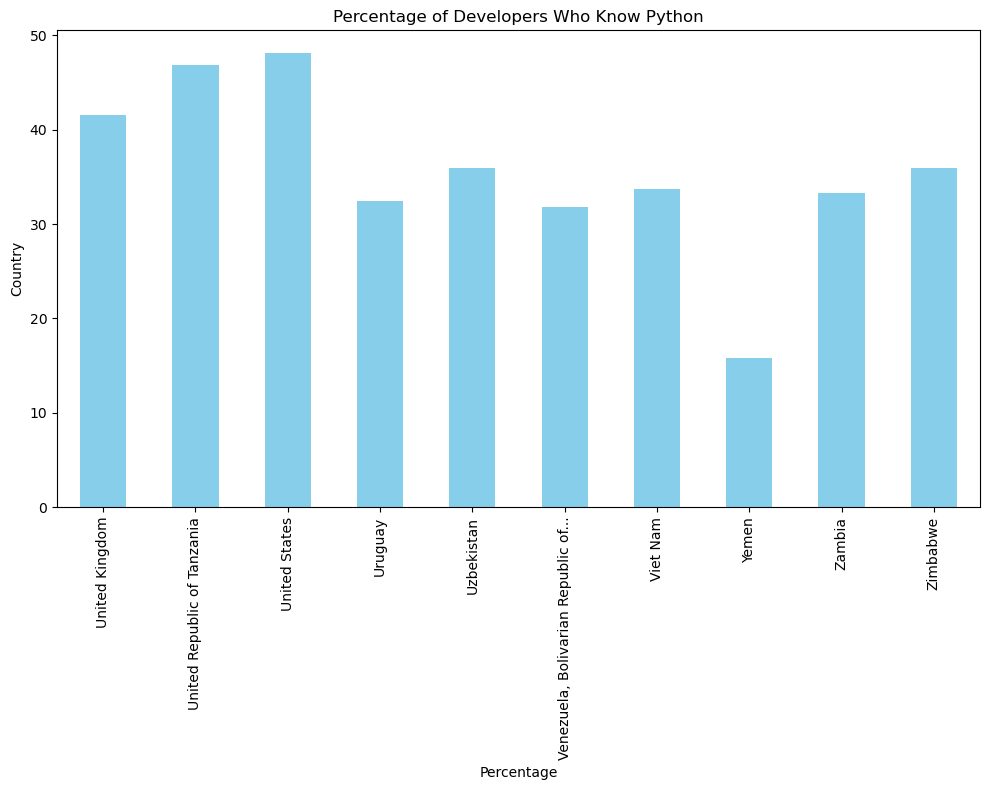

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
percentage.tail(10).plot(kind='bar', color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Percentage of Developers Who Know Python')
plt.tight_layout()
plt.show()

### 3. In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [11]:
country_counts = data['Country'].value_counts()
country_counts = country_counts[country_counts > 250]

filtered_df = data[data['Country'].isin(country_counts.index)]

average_hours_per_country = filtered_df.groupby('Country')['WorkWeekHrs'].max()
sorted_countries = average_hours_per_country.sort_values(ascending=False)

print(sorted_countries.head(10))

Country
India          4850.0
Switzerland    4125.0
Sweden         3875.0
Sri Lanka      1012.0
Turkey          475.0
Brazil          425.0
Austria         425.0
Poland          425.0
Germany         425.0
Spain           415.0
Name: WorkWeekHrs, dtype: float64


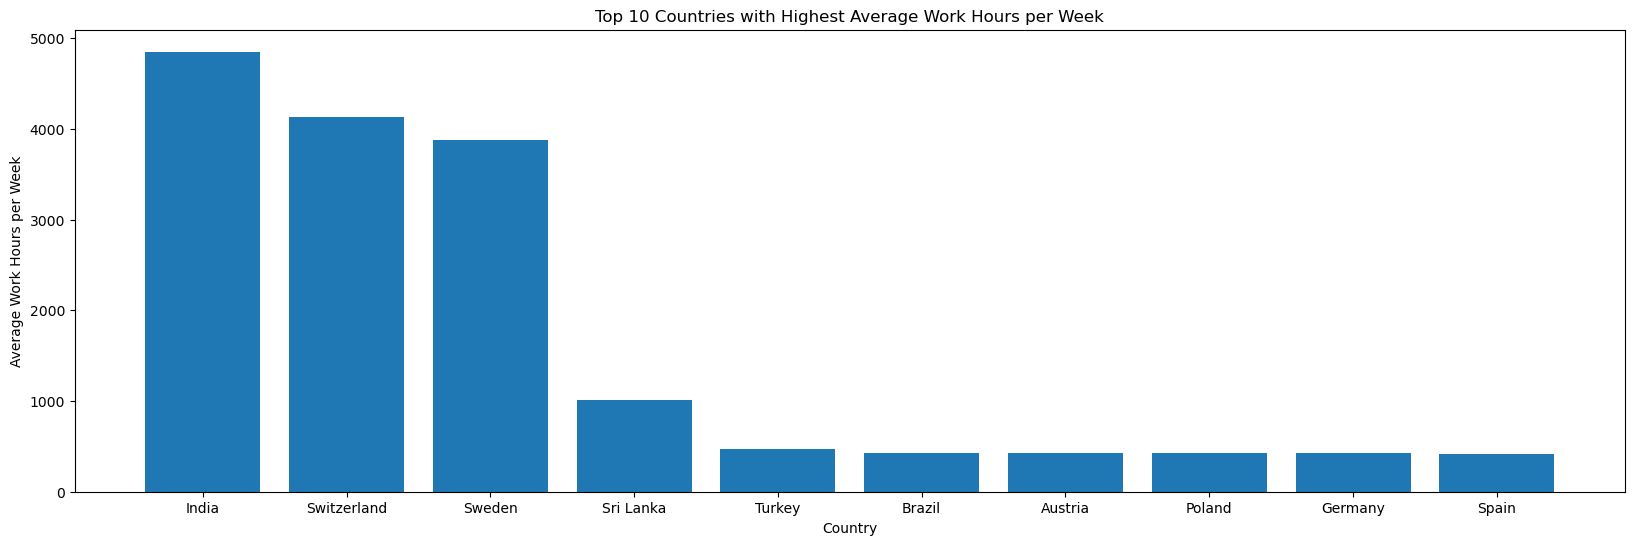

In [36]:
plt.figure(figsize=(20,6))
plt.bar(sorted_countries.index[:10], sorted_countries.values[:10])
plt.xlabel('Country')
plt.ylabel('Average Work Hours per Week')
plt.title('Top 10 Countries with Highest Average Work Hours per Week')
plt.show()

###  4. Based on this survey, what will be the most desired programming language for the year 2020?

In [31]:
desired_languages_2020 = data['LanguageDesireNextYear'].str.split(';', expand=True).stack()

desired_languages_2020.value_counts().head(10)

JavaScript               44739
Python                   40006
HTML/CSS                 36645
SQL                      33566
TypeScript               23720
Java                     23508
C#                       22449
Bash/Shell/PowerShell    21303
Go                       17060
C++                      16856
dtype: int64

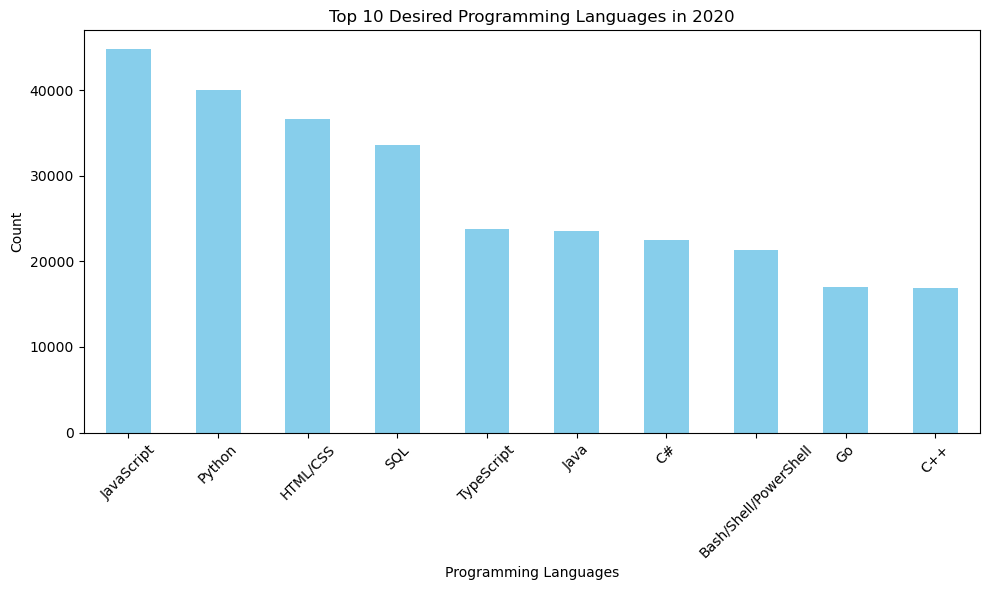

In [62]:
top_desired_languages = desired_languages_2020.value_counts().head(10)
plt.figure(figsize=(10, 6))
top_desired_languages.plot(kind='bar', color='skyblue')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.title('Top 10 Desired Programming Languages in 2020')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. What is the distribution of people who code as a hobby based on gender and continent (hint: use your mapping of country to continent)?

In [51]:
data = data.merge(continent[['Country', 'Continent']], on='Country', how='left')

In [52]:
data.Hobbyist = data.Hobbyist.replace({"Yes": 1, "No": 0})

In [53]:
def sex(string):
    if string == 'Man':
        return 'Man'
    elif string == 'Woman':
        return 'Woman'
    else:
        return "Others"


In [54]:
data.Gender = list(map(sex,data.Gender))

In [55]:
df=data.groupby(['Continent','Gender'])['Hobbyist'].count()
df

Continent      Gender
Africa         Man        2334
               Others      130
               Woman       191
Asia           Man       16598
               Others     1304
               Woman      1191
Europe         Man       30190
               Others     1329
               Woman      2048
North America  Man        3962
               Others      211
               Woman       372
Oceania        Man        2160
               Others      130
               Woman       144
South America  Man        3166
               Others       88
               Woman       180
Name: Hobbyist, dtype: int64

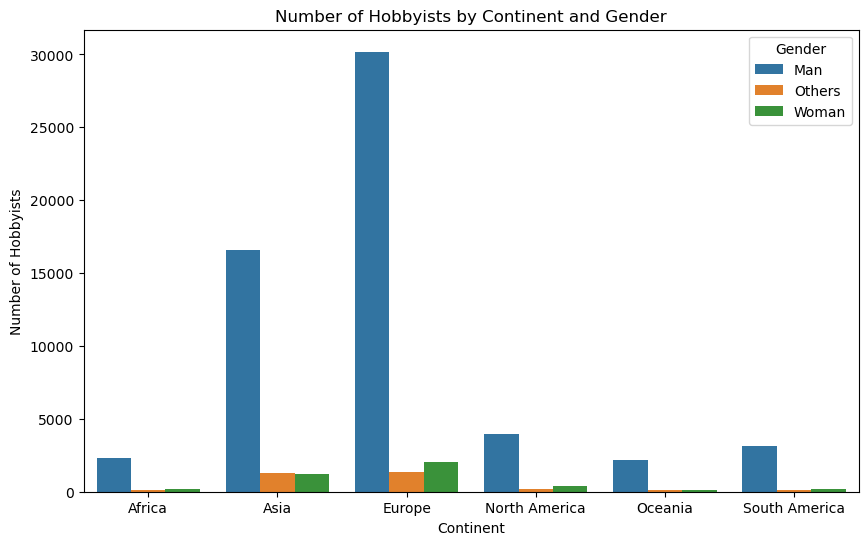

In [59]:
df = data.groupby(['Continent', 'Gender'])['Hobbyist'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Hobbyist', hue='Gender', data=df)
plt.xlabel('Continent')
plt.ylabel('Number of Hobbyists')
plt.title('Number of Hobbyists by Continent and Gender')
plt.show()

### 6.Generate the report for job and career satisfaction of developer based on their gender and continent?

In [27]:
data.groupby(['Continent','Gender','JobSat'])['Respondent'].count()

Continent      Gender  JobSat                            
Africa         Man     Neither satisfied nor dissatisfied    225
                       Slightly dissatisfied                 253
                       Slightly satisfied                    515
                       Very dissatisfied                     133
                       Very satisfied                        339
                                                            ... 
South America  Woman   Neither satisfied nor dissatisfied     20
                       Slightly dissatisfied                  21
                       Slightly satisfied                     50
                       Very dissatisfied                      11
                       Very satisfied                         43
Name: Respondent, Length: 90, dtype: int64

In [28]:
data.groupby(['Continent','Gender','CareerSat'])['Respondent'].count()

Continent      Gender  CareerSat                         
Africa         Man     Neither satisfied nor dissatisfied    201
                       Slightly dissatisfied                 175
                       Slightly satisfied                    541
                       Very dissatisfied                     125
                       Very satisfied                        558
                                                            ... 
South America  Woman   Neither satisfied nor dissatisfied     13
                       Slightly dissatisfied                  25
                       Slightly satisfied                     56
                       Very dissatisfied                       7
                       Very satisfied                         52
Name: Respondent, Length: 90, dtype: int64